In [15]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation
import numpy as np
import math
from sklearn.model_selection import KFold
import seaborn as sns

In [4]:
from sklearn.svm import SVC

# Normalizador

In [10]:
class Nomalizer:
    def __init__(self):
        self.y_max=0.0
        self.y_min=0.0
        self.x_max=[]
        self.x_min=[]

    def fit(self,x,y):
        # Pega os valores minimos de 
        self.y_max=y['y'].max().tolist()
        self.y_min=y['y'].min().tolist()

        # Pega os valores maximos e minimos do X
        self.x_max=x.max().tolist()
        self.x_min=x.min().tolist()
    
    def normalize(self,x):
        #y_norm=y.map(self.y_norm_aux)
        x_norm=x.copy()
        norm_index=0
        for column in x.columns:
            x_column=[]
            for i in range(len(x[column])):
                x_column.append((x[column][i]-self.x_min[norm_index])/(self.x_max[norm_index]-self.x_min[norm_index]))
                
            norm_index+=1
            x_norm[column]=x_column    
        
        return x_norm#,y_norm
    
    def desnormalize(self,x_norm):
        #y=y_norm.map(self.y_desnorm_aux)
        x=x_norm.copy()
        norm_index=0
        for column in x_norm.columns:
            x_column=[]
            for i in range(len(x_norm[column])):
                x_column.append((x_norm[column][i]*(self.x_max[norm_index]-self.x_min[norm_index]))+self.x_min[norm_index])
                
            norm_index+=1
            x[column]=x_column    
        
        return x#,y
    
    def y_norm_aux(self,y):
        return (y-self.y_min)/(self.y_max-self.y_min)
    
    def y_desnorm_aux(self,y):
        return (y*(self.y_max-self.y_min))+self.y_min

# Preprocessamento dos dados

In [5]:
boston=pd.read_csv('dados/bostonbin.csv',header=None)
boston=boston.rename(columns={boston.columns[17]:'y'})
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,y
0,2011.0,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,1.0
1,2021.0,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,1.0
2,2022.0,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,1.0
3,2031.0,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,1.0
4,2032.0,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1801.0,-70.9860,42.2312,22.4,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,1.0
502,1802.0,-70.9910,42.2275,20.6,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,1.0
503,1803.0,-70.9948,42.2260,23.9,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,1.0
504,1804.0,-70.9875,42.2240,22.0,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,1.0


In [6]:
x=boston.iloc[:, 0:16]  
y=boston[['y']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [11]:
norm=Nomalizer()
norm.fit(X_train,y_train)
norm_Trx=norm.normalize(X_train)
norm_Tsx=norm.normalize(X_test)

# SVM

Modelo não ajustado

C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/////////////////////////////////////////////////
acuracia do modelo:  0.8618421052631579
revocação do modelo:  0.8641975308641975
precisao do modelo:  0.875
f1-score do modelo:  0.8695652173913043


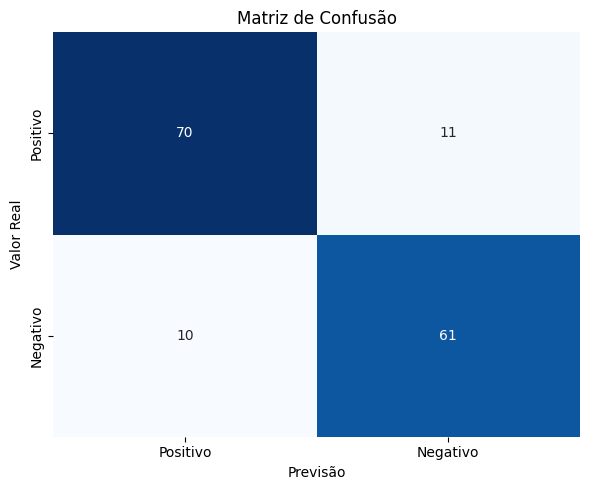

In [18]:
# Treinamento
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(norm_Trx, y_train)

# Predição
y_pred = svm_rbf.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test['y'][i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test['y'][i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()